In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%precision %.4f

import warnings

warnings.filterwarnings('ignore')

### Описание датасета
Сам [датасет](https://www.kaggle.com/datasets/shivachandel/kc-house-data?resource=download).
Описание датасета:
- id - идентификатор
- date - дата продажи
- price (целевой признак) - стоимость дома
- bedrooms - количество спален
- bathrooms - количество ванных комнат
- sqft_living - размер жилой площади в квадратных футах
- sqft_lot - размер участка в квадратных футах
- floors - количество этажей
- waterfront - наличие набережной
- view - показатель от 0 до 4, показывающий, насколько хорошим был вид на объект недвижимости
- condition - состояние дома, оцененное от 1 до 5
- grade - классификация по качеству конструкции, которая относится к типам используемых материалов и качеству изготовления
- sqft_above - квадратных футов над землей
- sqft_basmt - квадратных футов под землей
- yr_built - год постройки
- yr_renovated - год последнего ремонта. 0, если никогда
- zipcode - 5-значный почтовый индекс
- lat - широта
- long - долгота
- sqft_living15 - средний размер внутренней жилой площади для ближайших 15 домов, в квадратных футах
- sqft_lot15 - средний размер земельных участков для ближайших 15 домов, в квадратных футах

Предлагается решить задачу регрессии, предсказав цену дома по остальным признакам.

In [68]:
df = pd.read_csv('/kaggle/input/house-sales-prices-in-king-county-usa/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Cleaning

In [70]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

В признаке `sqft_above` (квадратных футов над землей) есть два пропущенных значения. Относительно общего количества данных это значение кажется небольшим, так что просто удалим.

In [71]:
df.dropna(subset=['sqft_above'], inplace=True)

### Анализ признаков и Feature Engineering
#### Целевой признак price - цена дома.

In [72]:
df['price'].describe()

count    2.161100e+04
mean     5.400850e+05
std      3.671430e+05
min      7.500000e+04
25%      3.217250e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Не очень удобно оперировать в долларах, поэтому переведем цену дома в тысячи долларов.

In [73]:
df['price'] /= 1000
df['price'].describe()

count    21611.000000
mean       540.085027
std        367.143049
min         75.000000
25%        321.725000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

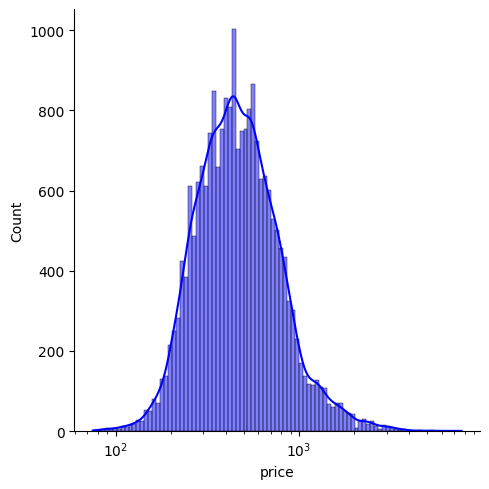

In [74]:
ax = sns.displot(x='price', data=df, kde=True, log_scale=True, color='b')

#### date - дата продажи

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

Признак `date` имеет тип данных `object`, что не позволит с ним работать, поэтому будет необходимо дополнительно обработать этот признак.

Простым выходом кажется разбить общую дату на три столбца - `year`, `month`, `day`. Однако сам `day` мало что говорит, возможно, было бы полезнее рассматривать именно праздничные дни, но пока что ограничимся годом и месяцем.

In [76]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df.drop(columns=['date'], inplace=True)

In [77]:
df['year'].value_counts()

year
2014    14632
2015     6979
Name: count, dtype: int64

Видимо, в датасете присутствуют данные лишь за 2014 и 2015 год, так что заменим на 0 и 1.

In [78]:
df['year_cat'] = 0
df.loc[df['year'] == 2015, 'year_cat'] = 1
df.drop(columns=['year'], inplace=True)

Рассмотрим, в какой из годов было больше покупок:

<Axes: xlabel='year_cat', ylabel='count'>

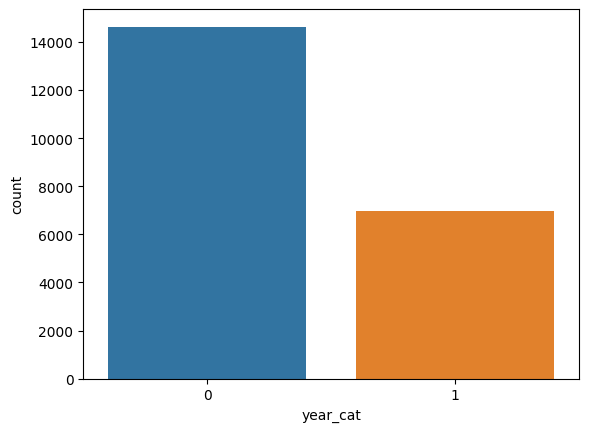

In [79]:
sns.countplot(df, x='year_cat')

Рассмотрим зависимость количества покупок домов от месяца:

<Axes: xlabel='month', ylabel='count'>

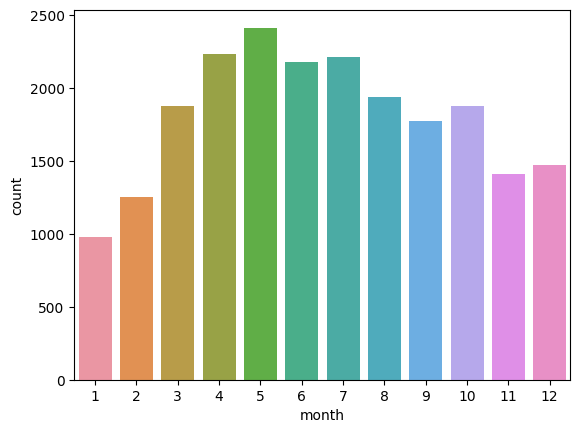

In [80]:
sns.countplot(df, x='month')

Из графика следует, что чаще всего дома покупали весной (апрель, май) и летом (июнь, июль), реже всего - зимой. 

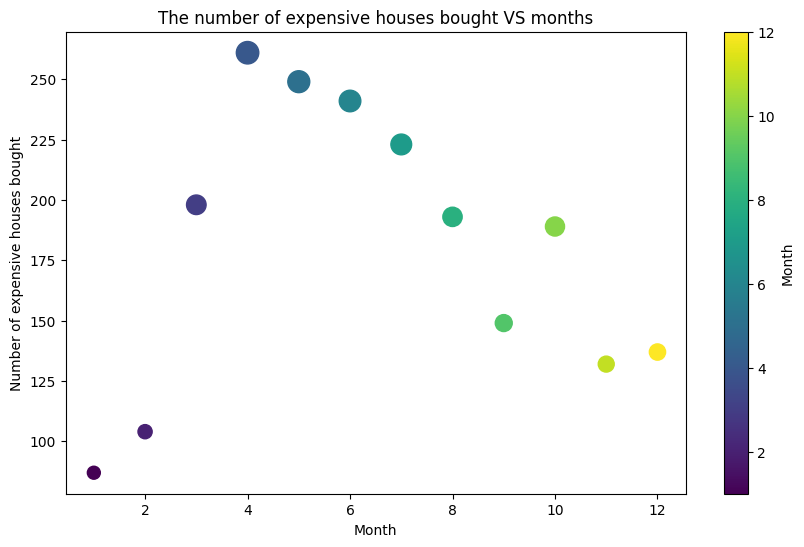

In [81]:
import matplotlib.pyplot as plt

quantile = df['price'].quantile(q=0.9)
filtered_data = df[df['price'] >= quantile]
grouped_data = filtered_data.groupby('month').count()

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data.index, grouped_data['price'], c=grouped_data.index, s=grouped_data['price'], cmap='viridis')
plt.title('The number of expensive houses bought VS months')
plt.xlabel('Month')
plt.ylabel('Number of expensive houses bought')
plt.colorbar(label='Month')
plt.show()

Цена домов также зависит от месяца года: самые дорогие дома также покупались с апреля по июнь.

#### Признаки `bedrooms` и `bathrooms`

In [82]:
df['bedrooms'].describe()

count    21611.000000
mean         3.370830
std          0.930092
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

В среднем у проданных домов было по 3 комнаты.

In [83]:
df[df['bedrooms'] > 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year_cat
8757,1773100755,520.0,11,3.00,3000,4960,2.0,0,0,3,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,8,0
15870,2402100895,640.0,33,1.75,1620,6000,1.0,0,0,5,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,0


На удивление домов с очень большим количеством комнат (> 10) всего две, и обе они были проданы относительно дешево.

In [84]:
df['bathrooms'].describe()

count    21611.000000
mean         2.114791
std          0.770157
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

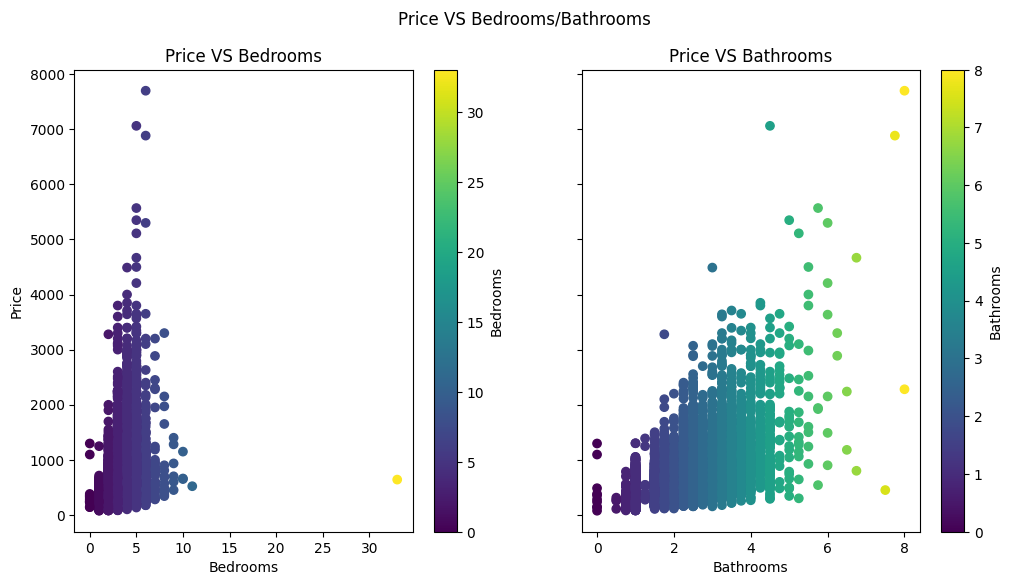

In [85]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
scatter1 = ax1.scatter(df['bedrooms'], df['price'], c=df['bedrooms'], cmap='viridis', marker='o')
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Price')
ax1.set_title('Price VS Bedrooms')
scatter2 = ax2.scatter(df['bathrooms'], df['price'], c=df['bathrooms'], cmap='viridis', marker='o')
ax2.set_xlabel('Bathrooms')
ax2.set_title('Price VS Bathrooms')
cbar1 = plt.colorbar(scatter1, ax=ax1, label='Bedrooms')
cbar2 = plt.colorbar(scatter2, ax=ax2, label='Bathrooms')
fig.suptitle("Price VS Bedrooms/Bathrooms")
plt.show()


С увеличением количества ванных комнат цена явно растет, с увеличением комнат - это не так очевидно.

#### Признаки `sqft_living` - размер жилой площади в квадратных футах - и `sqft_living15` - среднее `sqft_living` для ближайших 15 домов

In [86]:
df['sqft_living'].describe()

count    21611.000000
mean      2079.853454
std        918.422406
min        290.000000
25%       1426.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [87]:
df['sqft_living15'].describe()

count    21611.000000
mean      1986.559576
std        685.416548
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

Из интересного можно заметить, что в среднем размер жилой площади продаваемых домов был выше, чем усредненный у их соседей.

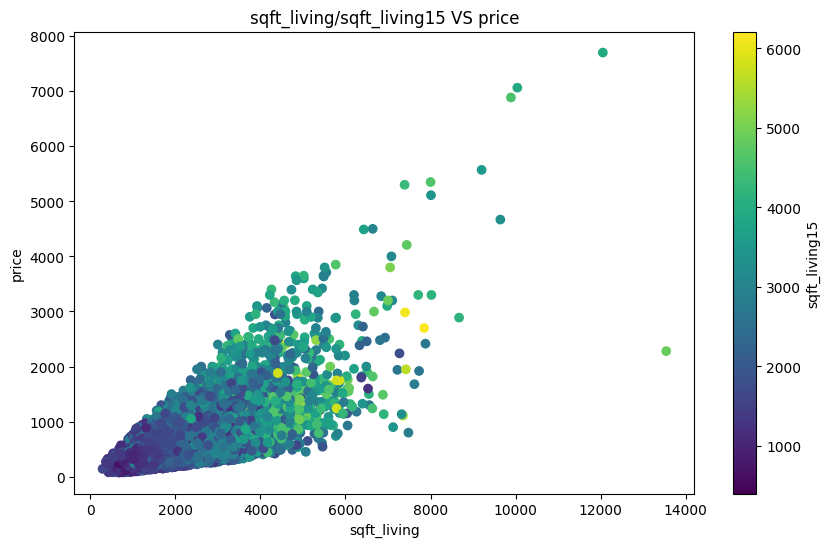

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['sqft_living'], df['price'], c=df['sqft_living15'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='sqft_living15')
plt.title('sqft_living/sqft_living15 VS price')
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.show()

На графике можно увидеть, что интуитивные соображения о том, что размер жилой зоны сильно влияет на цену дома, подкрепляются данными. Также размеры жилой зоны продаваемого дома и их соседей сопоставимы.

#### Признаки `sqft_lot` - размер участка в квадратных футах - и `sqft_lot15` - среднее `sqft_lot` для ближайших 15 домов

In [89]:
df['sqft_lot'].describe()

count    2.161100e+04
mean     1.510771e+04
std      4.142235e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068850e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [90]:
df['sqft_lot15'].describe()

count     21611.000000
mean      12769.025357
std       27305.369808
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.500000
max      871200.000000
Name: sqft_lot15, dtype: float64

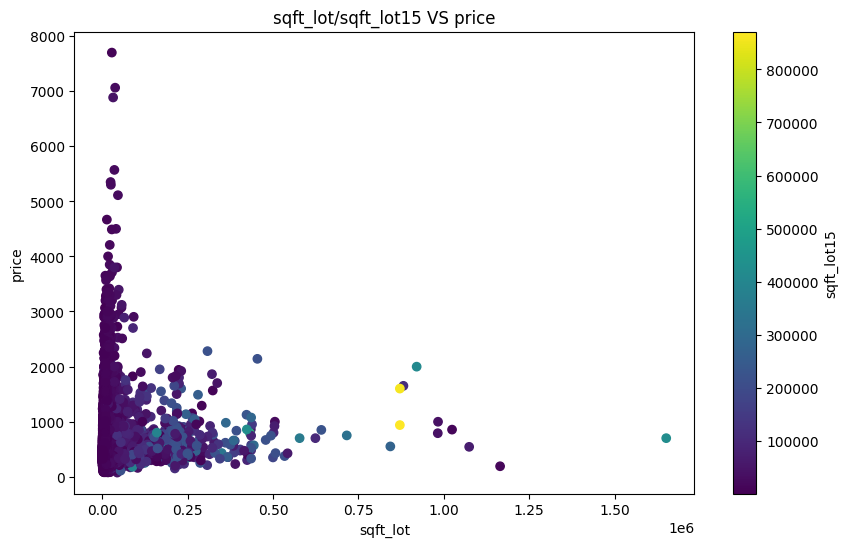

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['sqft_lot'], df['price'], c=df['sqft_lot15'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='sqft_lot15')
plt.title('sqft_lot/sqft_lot15 VS price')
plt.xlabel('sqft_lot')
plt.ylabel('price')

plt.show()

Из графика не видно, чтобы размер участка особо влиял на цену.

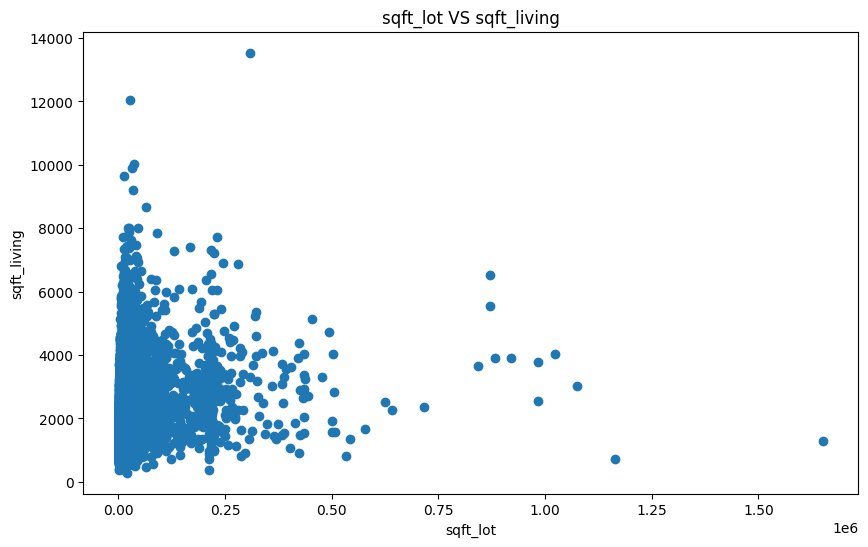

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_lot'], df['sqft_living'], marker='o')
plt.title('sqft_lot VS sqft_living')
plt.xlabel('sqft_lot')
plt.ylabel('sqft_living')

plt.show()

И даже не прослеживается линейной зависимости у размеров участка и размеров жилой зоны.

#### `floors` - количество этажей - и `waterfront` - наличие набережной

In [93]:
df['floors'].value_counts()

floors
1.0    10679
2.0     8241
1.5     1909
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

У половины людей дом был одноэтажным.

In [94]:
df['waterfront'].value_counts()

waterfront
0    21448
1      163
Name: count, dtype: int64

У подавляющего большинства домов не было набережной.

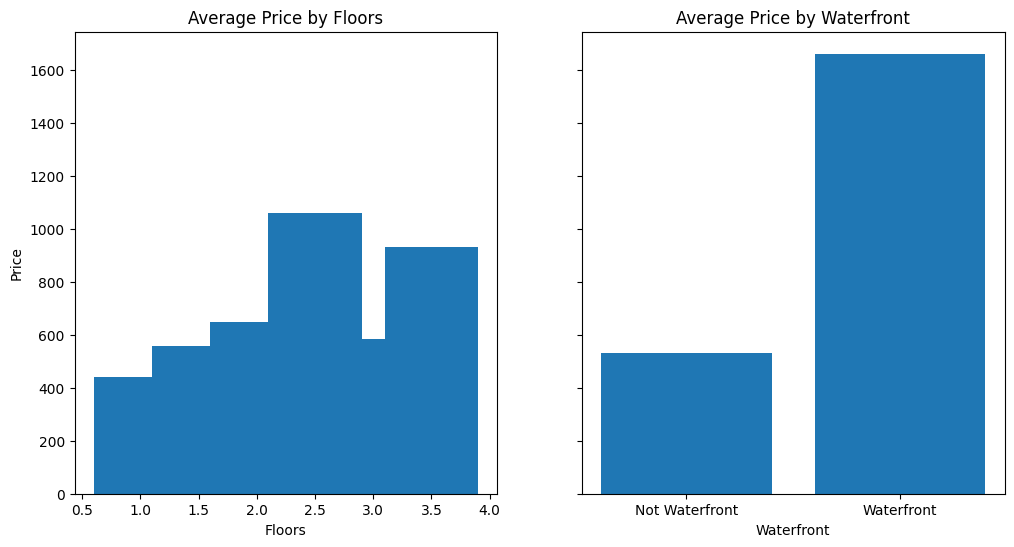

In [95]:
import matplotlib.pyplot as plt
import numpy as np
df_waterfront = df.groupby('waterfront')['price'].mean()
df_floors = df.groupby('floors')['price'].mean()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax1.bar(df_floors.index, df_floors.values)
ax1.set_xlabel('Floors')
ax1.set_ylabel('Price')
ax1.set_title('Average Price by Floors')
ax2.bar(df_waterfront.index, df_waterfront.values)
ax2.set_xlabel('Waterfront')
ax2.set_title('Average Price by Waterfront')
ax2.set_xticks(np.arange(2))
ax2.set_xticklabels(['Not Waterfront', 'Waterfront'])

plt.show()

По графику зависимости цены от количества этажей самыми дорогими вышли 2,5- и 3,5-этажные дома, самая низкая стоимость - у одноэтажного.
Наличие набережной же по имеющимся данным в разы поднимает стоимость дома.

Для дальнейшей работы следует исключить признаки `id` и `zipcode`, так как они очевидно не могли влиять на цену дома.

In [96]:
df.drop(columns=['id', 'zipcode'], inplace=True)

Заменим количественные признаки `yr_built` и `yr_renovated` на категориальный `repair_category`.

In [97]:
df['repair_category'] = 0

df['yr_renovated'] = df[['yr_renovated', 'yr_built']].max(axis=1)
df.loc[df['yr_renovated'] <= 1920, 'repair_category'] = 0
df.loc[(df['yr_renovated'] > 1920) & (df['yr_renovated'] <= 1940), 'repair_category'] = 1
df.loc[(df['yr_renovated'] > 1940) & (df['yr_renovated'] <= 1960), 'repair_category'] = 2
df.loc[(df['yr_renovated'] > 1960) & (df['yr_renovated'] <= 1980), 'repair_category'] = 3
df.loc[(df['yr_renovated'] > 1980) & (df['yr_renovated'] <= 2000), 'repair_category'] = 4
df.loc[(df['yr_renovated'] > 2000) & (df['yr_renovated'] <= 2010), 'repair_category'] = 5
df.loc[(df['yr_renovated'] > 2010), 'repair_category'] = 6
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year_cat,repair_category
0,221.9,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,1955,47.5112,-122.257,1340,5650,10,0,2
1,538.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,12,0,4
2,180.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,1933,47.7379,-122.233,2720,8062,2,1,1
3,604.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,1965,47.5208,-122.393,1360,5000,12,0,3
4,510.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,1987,47.6168,-122.045,1800,7503,2,1,4


In [98]:
df['repair_category'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
repair_category,
3,4886
4,4829
2,4039
5,3697
1,1575
0,1319
6,1266


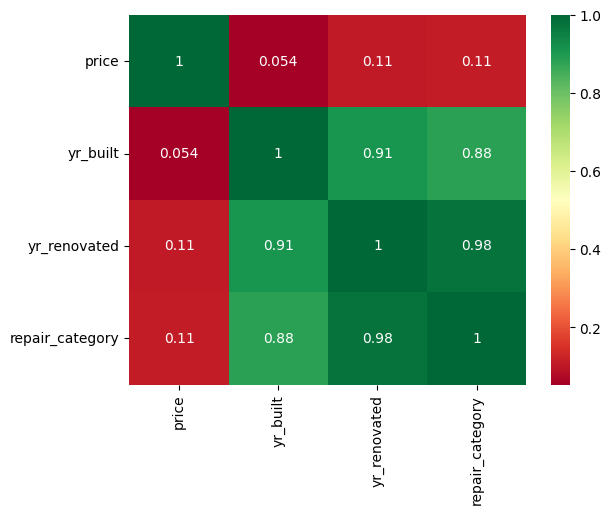

In [99]:
sns.heatmap(df[['price', 'yr_built', 'yr_renovated', 'repair_category']].corr(), annot=True, cmap='RdYlGn');

Таким образом, можно удалить ненужные признаки.

In [100]:
df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.info

<bound method DataFrame.info of          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221.900         3       1.00         1180      5650     1.0   
1      538.000         3       2.25         2570      7242     2.0   
2      180.000         2       1.00          770     10000     1.0   
3      604.000         4       3.00         1960      5000     1.0   
4      510.000         3       2.00         1680      8080     1.0   
...        ...       ...        ...          ...       ...     ...   
21608  360.000         3       2.50         1530      1131     3.0   
21609  400.000         4       2.50         2310      5813     2.0   
21610  402.101         2       0.75         1020      1350     2.0   
21611  400.000         3       2.50         1600      2388     2.0   
21612  325.000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement      lat  \
0               0     0          3      7     

Рассмотрим корреляцию всех признаков:

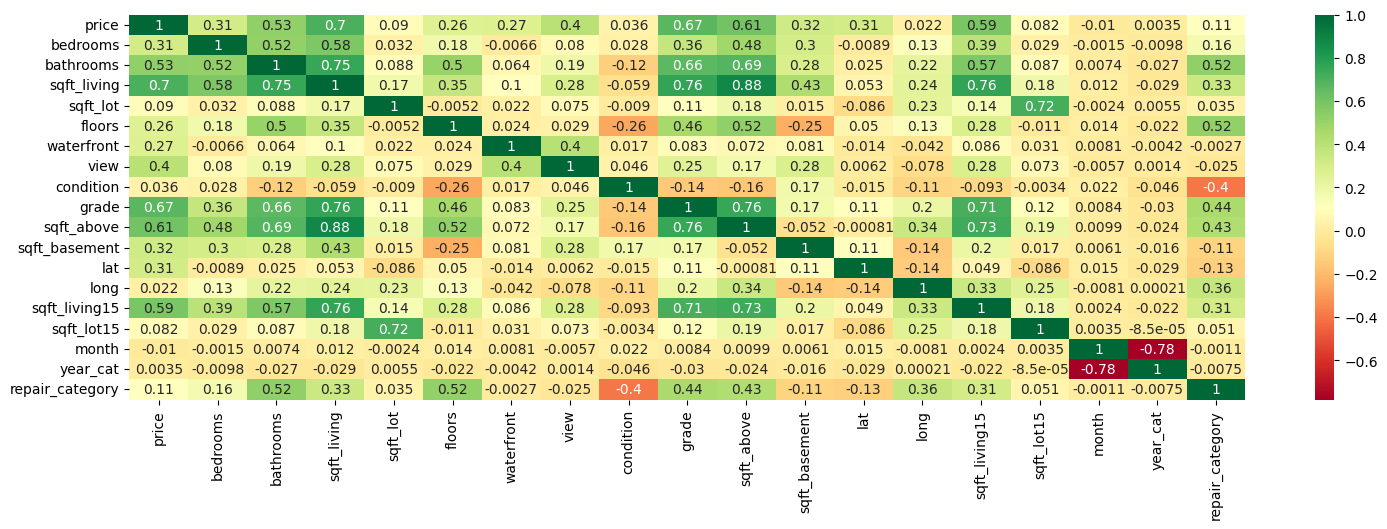

In [101]:
sns.heatmap(df.astype(float).corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

Как и ожидалось, признак `price` больше всего кореллирует с признаками `bathrooms`, `sqft_living`,  `grade`, `sqft_above` и `sqft_living15`.